# Parcel matching (state=60)
To apprecite qualitatively the reproducibility of parcels between the `friends-s01` training and validation sets, we ranked each parcel of the training set based on its intra-subject reproducibility metric with the validation set. We started by examining the large distributed networks which led to the highest gap between intra- vs inter-subject reproducibility (`cluster-20_state-60`, with `fwhm=5`). We present a selection of parcels with high, medium, and low reproducibility, both at the intra- and inter-subject level.  

```{admonition} Computational reproducibility 
The results for this experiment have been precomputed usin the scripts `repro_summary.py` and `repro_friends-s01.sh`. The results are accessed using a number of helper tools available in the `dypac_utils` and `repro_summary` modules. The following hidden block of code loads the necessary libraries to generate the figures, sets the path to find the pre-comupted results as well as some visualisation parameters.
```

In [1]:
import os
import numpy as np
from cneuromod_embeddings.dypac_utils import get_root_data, load_dypac
from cneuromod_embeddings.repro_summary import load_repro, visu_match

root_data = get_root_data('friends-s01')
fwhm = 5
cluster = 20
state = 60
R = load_repro(root_data=os.path.join(root_data, 'repro_friends-s01'), fwhm=fwhm, cluster=cluster, state=state)

## Intra-subject matching
The code used to do the ranking and pairing of parcels for `sub-01` between test and retest is availaible below.

In [2]:
subject = 'sub-01'
Rintra = R[subject][subject]
match_val = np.max(Rintra, axis=0)
match_pair = np.argmax(Rintra, axis=0)
order = np.argsort(-match_val)
model1, mask_img1 = load_dypac(subject=subject, root_data=root_data, fwhm=fwhm, cluster=cluster, state=state, batch="even")
model2, mask_img2 = load_dypac(subject=subject, root_data=root_data, fwhm=fwhm, cluster=cluster, state=state, batch="odd")

The following figure represents the most reproducible parcels in `friends-s01` for `sub-01`. All 5 parcels involve distributed cortical territories, with very close similarity between test and retest, making it hard to identify differences visually. We can note that three parcels involve the temporal superior cortex, while two involve the S2 areas. However, there are differences between these parcels both in the involvement of other, distributed brain regions, see for example frontal regions in the axial slice between row 4 and 5. There were differences as well as the specific borders of the regions, which is apparent for example in the superior temporal cortex in the sagittal slice of rows 2 and 5. This observation is consistent with our previous work on the Midnight Brain Scan dataset \cite{Boukhdhir2020}.

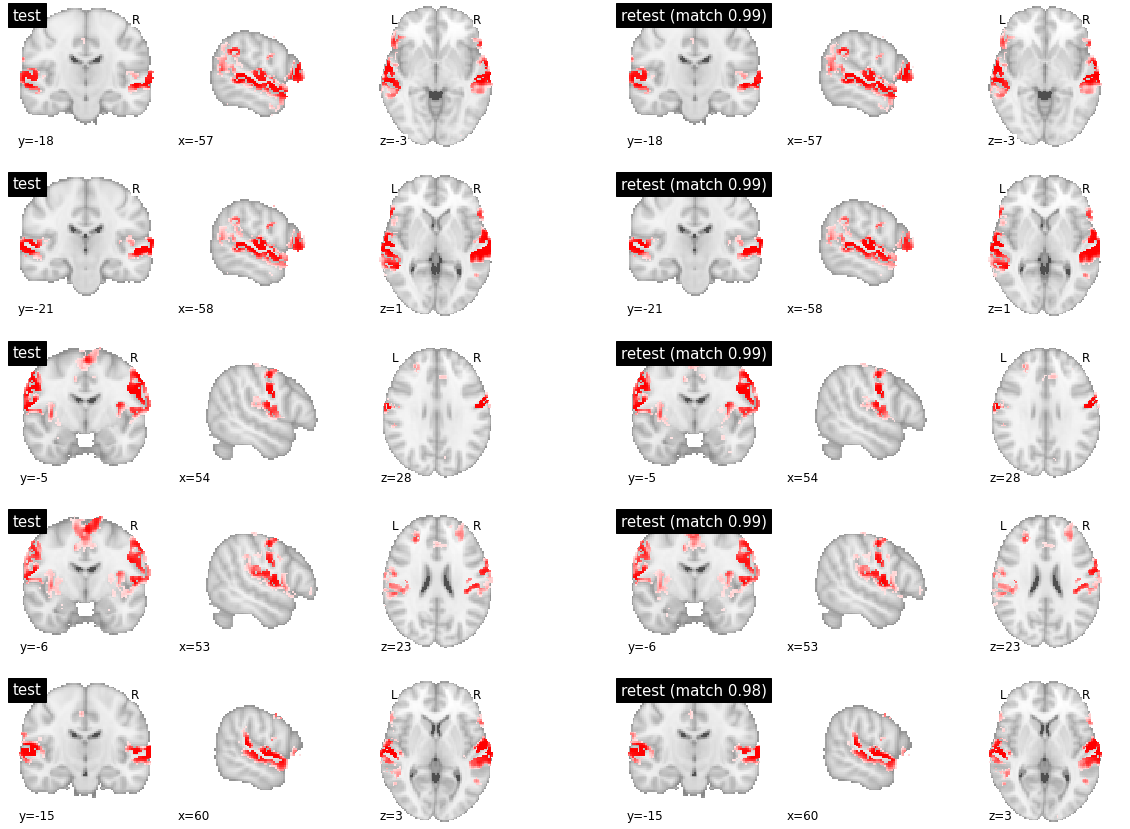

In [3]:
# Components 0-4, out of 60 ranked by decreasing reproducibility
visu_match(0, 5, model1, model2, order, match_pair, match_val)

The high level of spatial similarity between test and retest was also visible in parcels with median reproducibility, and even in the parcels with some of the lowest reproducibility metric, although with more noise present. See supplemental figures below for examples of such parcels. Altogether, qualitative inspection not only confirmed the near-perfect reproductibility of most parcels, but evidenced that even parcels with lower scores have a clear convergence between test and retest.

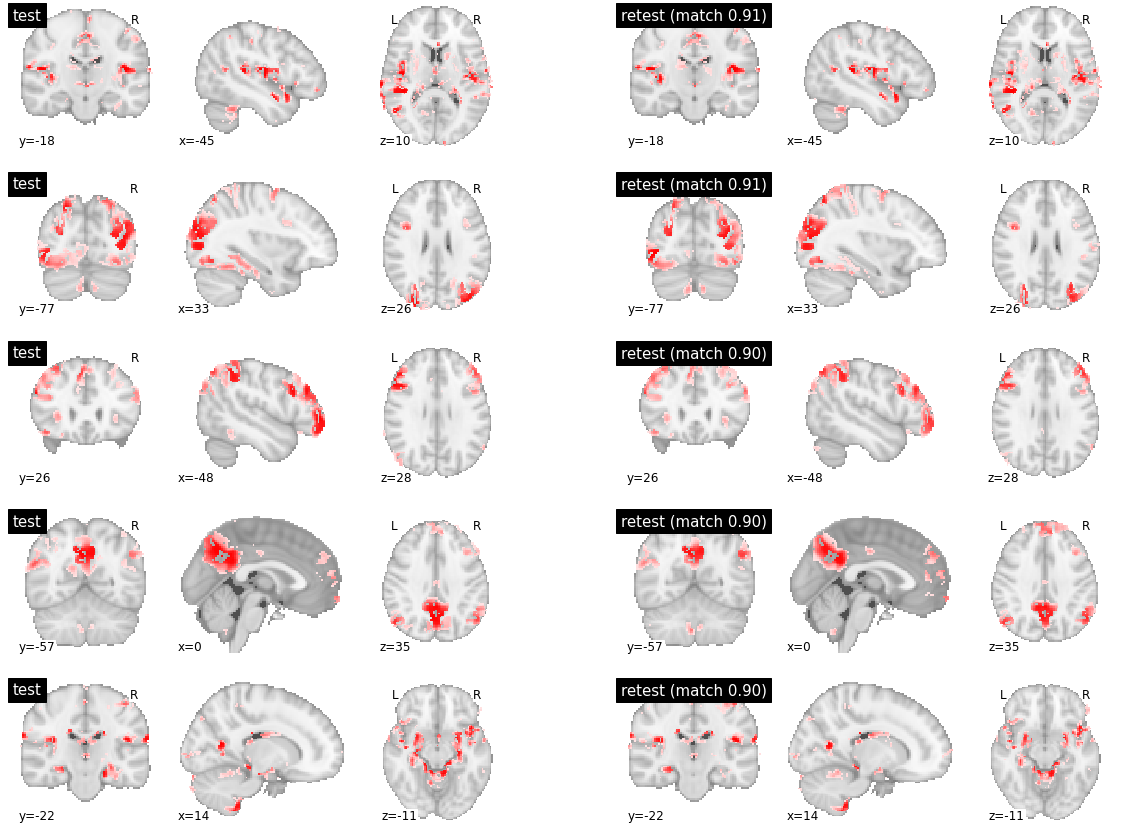

In [4]:
# Components 30-34, out of 60 ranked by decreasing reproducibility
visu_match(30, 5, model1, model2, order, match_pair, match_val)

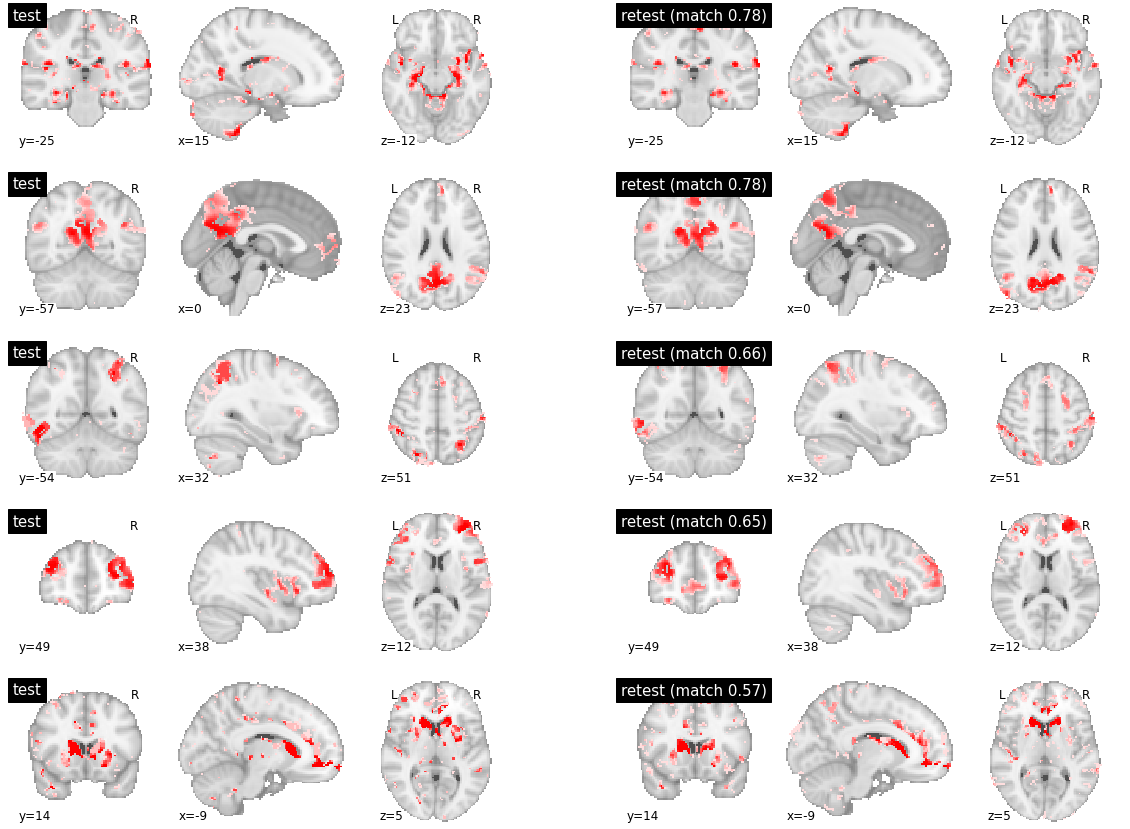

In [5]:
# Components 50-54, out of 60 ranked by decreasing reproducibility
visu_match(50, 5, model1, model2, order, match_pair, match_val)

## Inter-subject matching 
The code below replicated the spatial matching procedure between two subjects (here with `sub-01` and `sub-05`)

In [6]:
sub1 = 'sub-01'
sub2 = 'sub-05'
Rintra = R[sub1][sub2]
match_val = np.max(Rintra, axis=1)
match_pair = np.argmax(Rintra, axis=1)
order = np.argsort(-match_val)
model1, mask_img1 = load_dypac(subject=sub1, root_data=root_data, fwhm=fwhm, cluster=cluster, state=state, batch="even")
model2, mask_img2 = load_dypac(subject=sub2, root_data=root_data, fwhm=fwhm, cluster=cluster, state=state, batch="even")

The most reproducible parcels were found in various territories, including the cerebellum (row 1), visual cortex (rows 2-3), posterior default-mode network (row 4) and superior temporal cortex (row 5). But the reproducibility index was 0.6 and lower. Clear difference between subjects could indeed be observed in the boundaries of the regions involved in each network, for all five presented parcels.

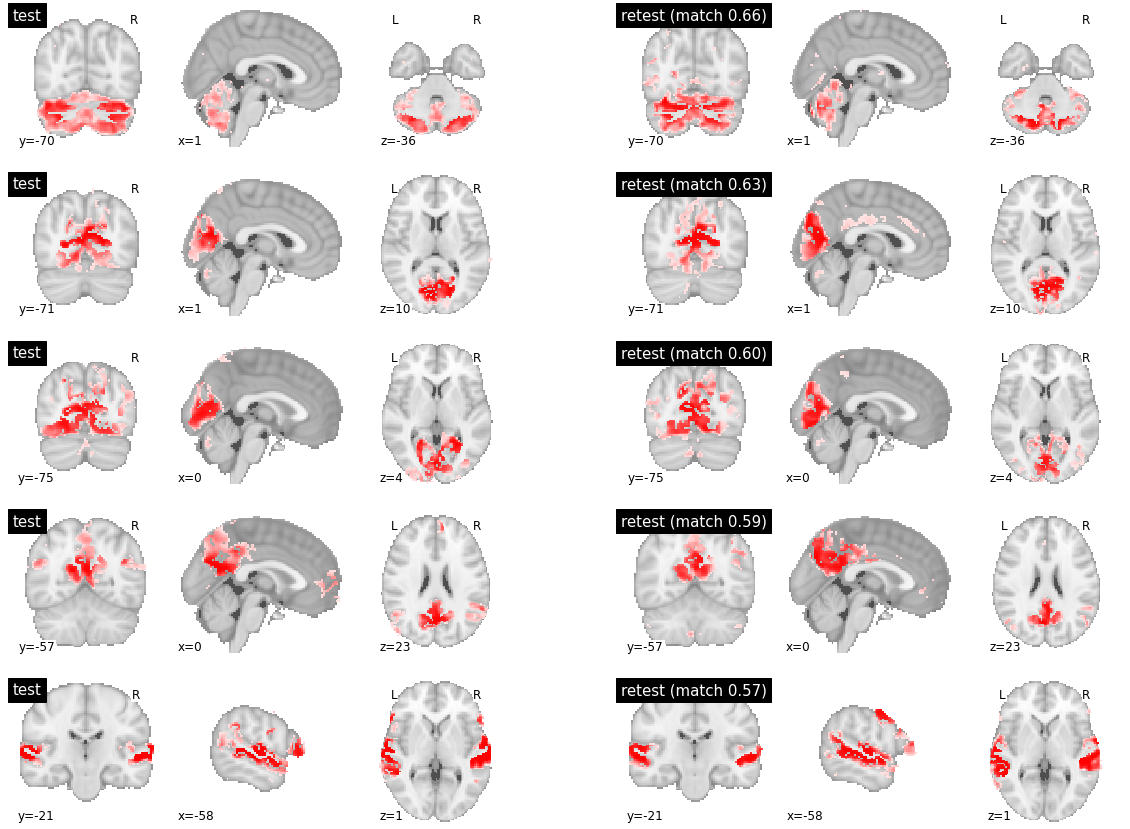

In [7]:
visu_match(0, 5, model1, model2, order, match_pair, match_val)

When investigating parcels with medium or low inter-subject reproducibility, similar differences in boundaries were observed, often at several brain locations at the same time, and some distributed regions were also absent from some of the maps.

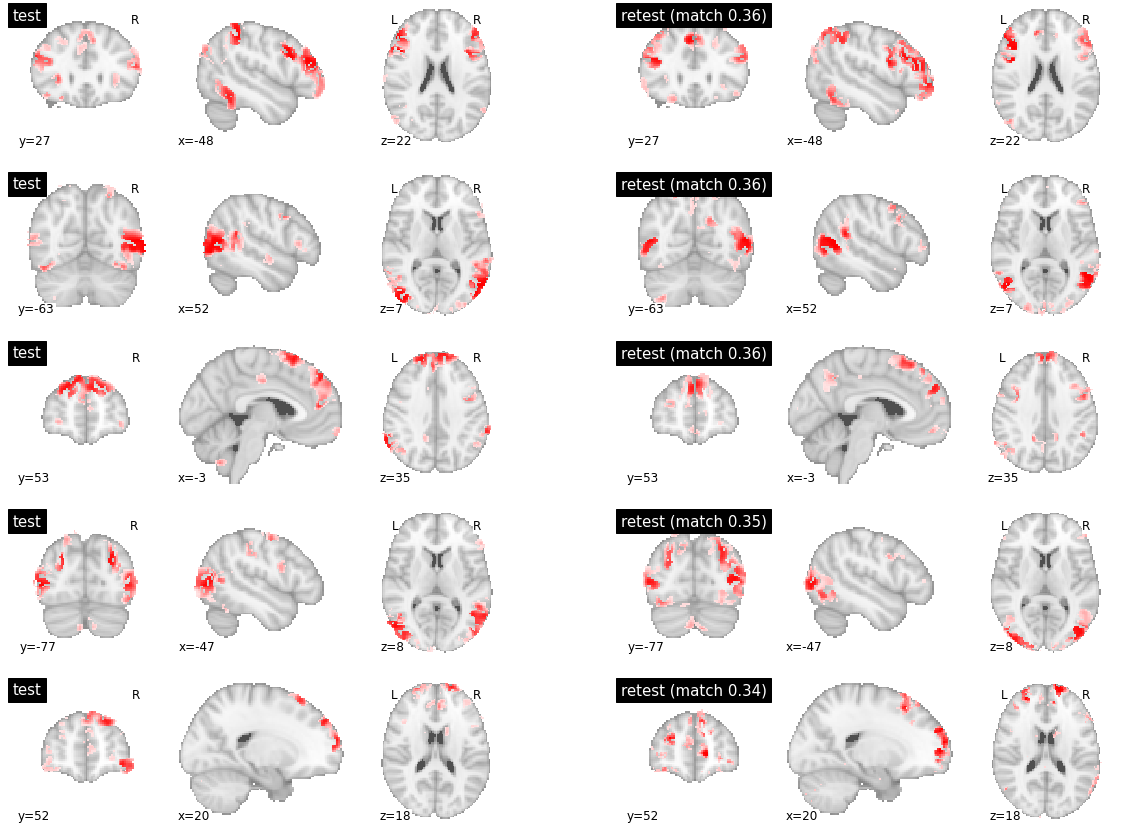

In [8]:
visu_match(30, 5, model1, model2, order, match_pair, match_val)

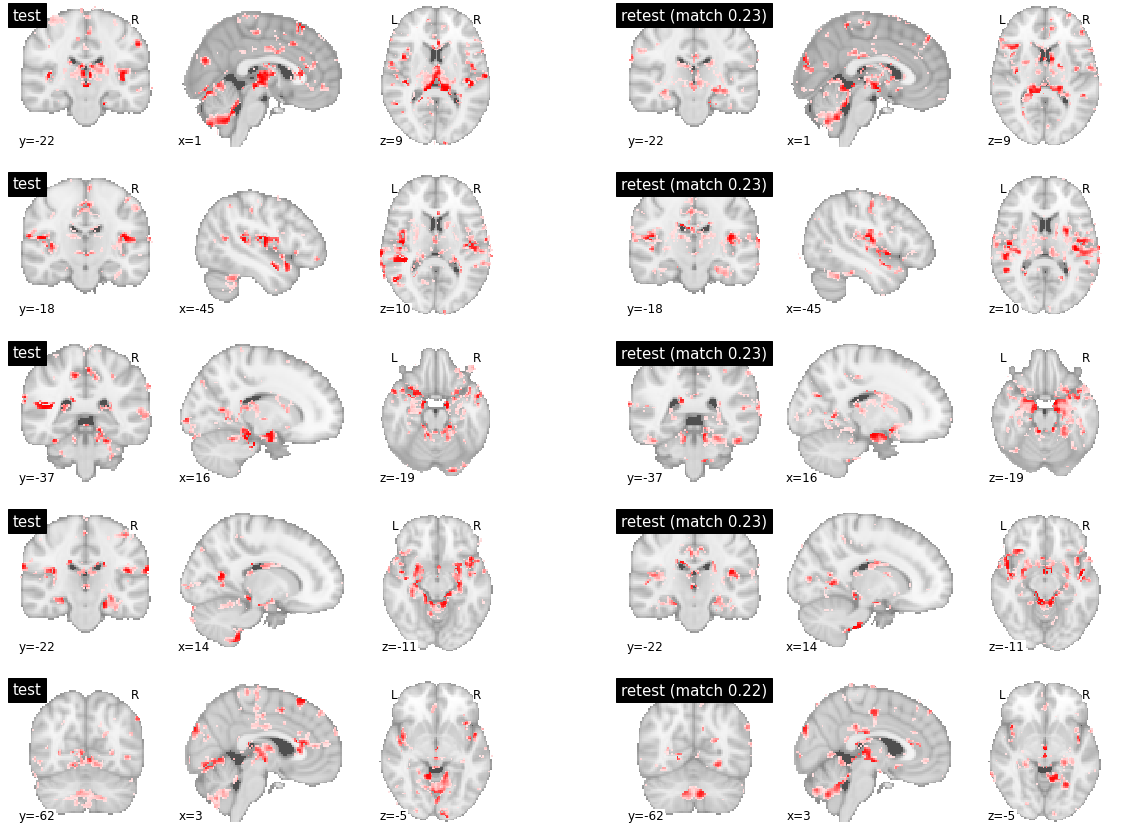

In [9]:
visu_match(50, 5, model1, model2, order, match_pair, match_val)